In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import os
import env
import wrangle

import sys
sys.path.append('/Users/nomer/codeup-data-science/Functions/')

import function

In [11]:
df = wrangle.wrangle_get_zillow()

this file exists, reading from csv file


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [17]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [18]:
#stats summary of numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [19]:
# Handling Null values
#let's turn our column values into a list
col = df.columns.to_list()

In [20]:
#are we dealing with any nulls?
num_missing = df[col].isna().sum()
num_missing

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [24]:
#what percent of my entire dataset is this?
pct_missing = num_missing / df.shape[0]
pct_missing

bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [25]:
#confirm whole numbers
for col in df.columns:
    print(col)
    print(df[col].value_counts().sort_index())
    print()

bedroomcnt
bedroomcnt
0.0      13187
1.0      23166
2.0     335473
3.0     964298
4.0     634289
5.0     150866
6.0      25166
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
12.0        12
13.0        16
14.0         7
15.0         6
16.0         2
18.0         3
25.0         1
Name: count, dtype: int64

bathroomcnt
bathroomcnt
0.00      13027
0.50         16
1.00     414324
1.50      31211
1.75          3
2.00     943589
2.50     142981
3.00     422841
3.50      28518
4.00      82155
4.50      19506
5.00      28362
5.50       6217
6.00      10747
6.50       1333
7.00       4394
7.50        384
8.00       1692
8.50        110
9.00        713
9.50         50
10.00       325
10.50        14
11.00       146
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: count, dtype: int64

calcula

In [27]:
#possibly an easier way to do this... create a lamda function
#let's see if there are any fractions in bathrooms
has_non_zero_decimal = df['bathroomcnt'].apply(lambda x: x % 1 != 0)
has_non_zero_decimal.any()

True

In [28]:
#how many?
has_non_zero_decimal.sum()

230362

In [30]:
# #put it all together for all the columns 
# ##so we can make sure those floats should be integers

# #include these columns
# columns_to_check = ['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount', 'county']

# # create a dictionary to store the count of non-zero decimal places for each column
# count_of_non_zero_decimal = {}

# # iterate through columns and check for non-zero decimal places
# for column in columns_to_check:
#     has_non_zero_decimal = (df[column] % 1 != 0).sum()
    
#     # store the count in the dictionary
#     count_of_non_zero_decimal[column] = has_non_zero_decimal

# # display the count of non-zero decimal places for each column
# print("Count of Non-Zero Decimal Places in Each Column:")
# for column, count in count_of_non_zero_decimal.items():
#     print(f"{column}: {count}")

In [32]:
# #columns we want to be integers
# make_ints = ['bedrooms','area','taxvalue','yearbuilt','county']

In [34]:
# #look through them to change the datatype
# for col in make_ints:
#     df[col] = df[col].astype(int)

In [36]:
# #rename those columns
# df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})

> #### Visualize Data

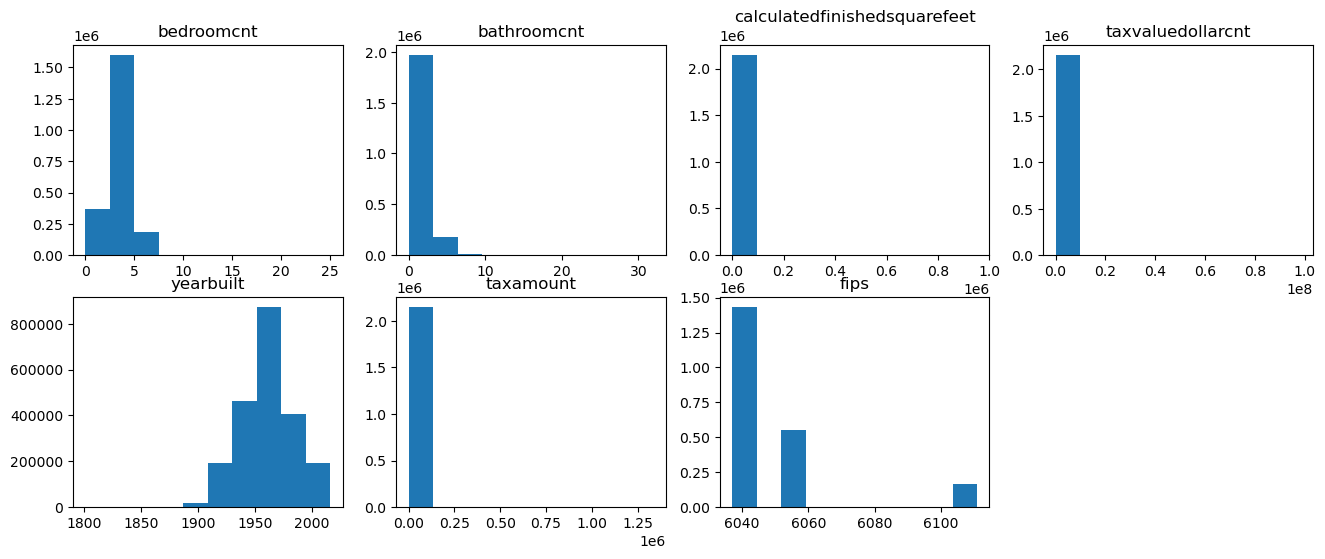

In [38]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show();

bedroomcnt


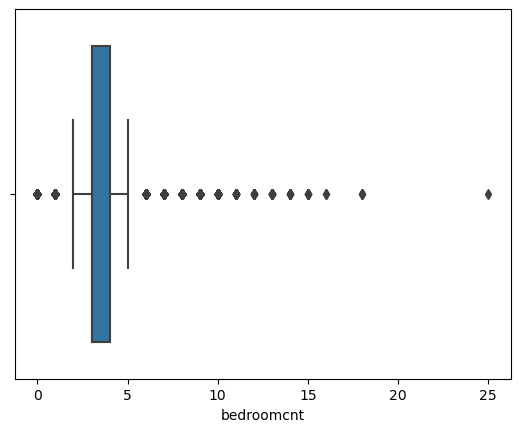

bathroomcnt


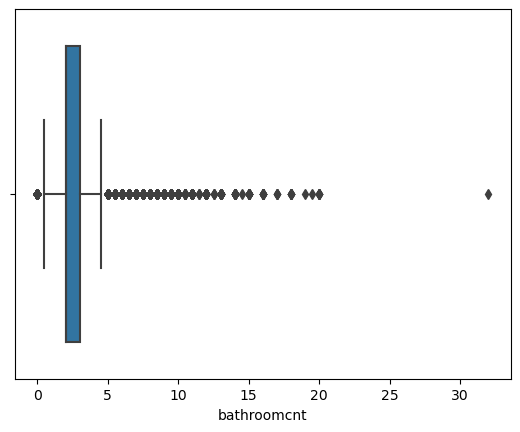

calculatedfinishedsquarefeet


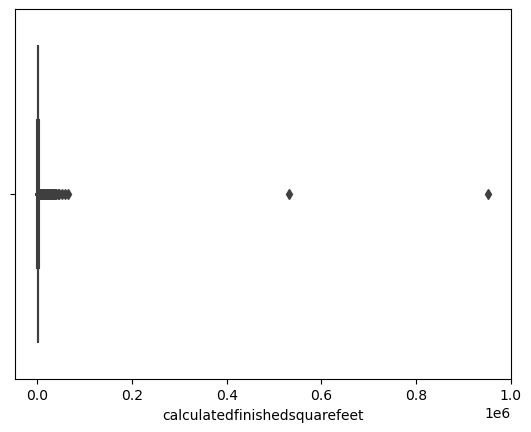

taxvaluedollarcnt


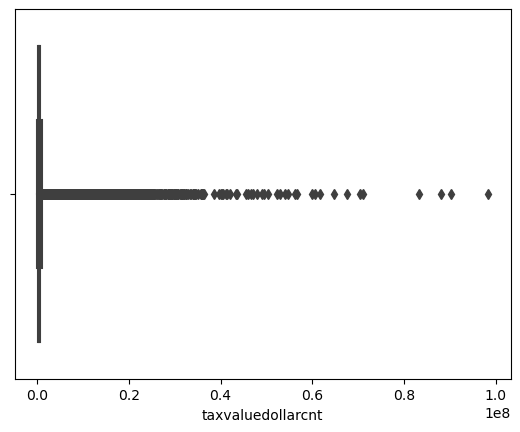

yearbuilt


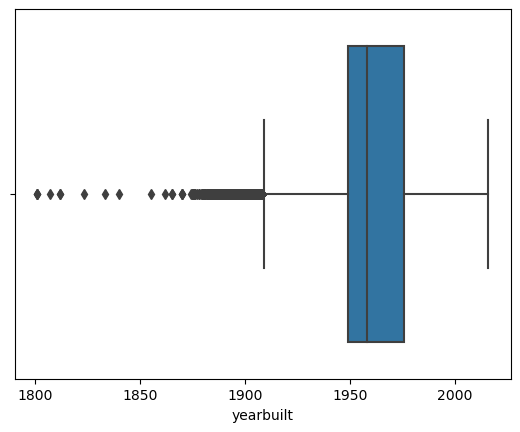

taxamount


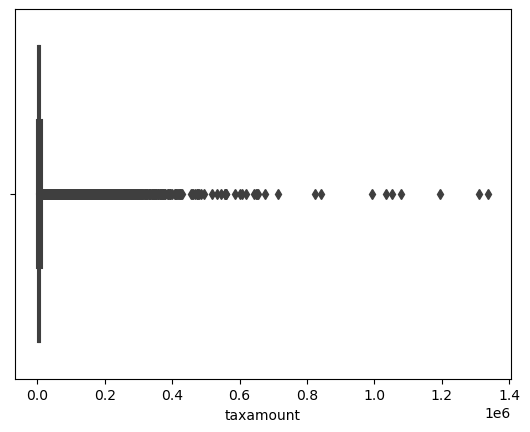

In [39]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show();
    
    # print(df[col].value_counts().sort_index())
    # print()

In [ ]:
# def get_zillow_data():
#     '''
#     This function acquires zillow.csv it is available
#     otherwise, it makes the SQL connection and uses the query provided
#     to read in the dataframe from SQL.
#     If they csv is not present, it will write one.
#     '''
#     filename = "zillow.csv"

#     if os.path.isfile(filename):

#         return pd.read_csv(filename, index_col=0)
#     else:
#         # Create the url
#         url = env.get_db_url('zillow')
        
#         sql_query = '''
#             SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
#             FROM properties_2017
#             WHERE propertylandusetypeid = 261'''

#         # Read the SQL query into a dataframe
#         df = pd.read_sql(zillow_query, url)

#         # Write that dataframe to disk for later. Called "caching" the data for later.
#         df.to_csv(filename)

#         # Return the dataframe to the calling code
#         return df

In [ ]:
# def prep_zillow(df):
#     '''
#     This function takes in a dataframe
#     renames the columns and drops nulls values
#     Additionally it changes datatypes for appropriate columns
#     and renames fips to actual county names.
#     Then returns a cleaned dataframe
#     '''
#     df = df.rename(columns = {'bedroomcnt':'bedrooms',
#                      'bathroomcnt':'bathrooms',
#                      'calculatedfinishedsquarefeet':'area',
#                      'taxvaluedollarcnt':'taxvalue',
#                      'fips':'county'})
    
#     df = df.dropna()
    
#     make_ints = ['bedrooms','area','taxvalue','yearbuilt']

#     for col in make_ints:
#         df[col] = df[col].astype(int)
        
#     df.county = df.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})
    
#     return df

In [5]:
df = wrangle.clean_zillow(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedroom    float64
 1   bathroom   float64
 2   square_ft  float64
 3   tax_value  float64
 4   yr_built   int64  
 5   tax        float64
 6   fips       float64
dtypes: float64(6), int64(1)
memory usage: 130.6 MB


In [8]:
train, validate, test = wrangle.splitting_data(df)

In [9]:
train.head()

,bedroom,bathroom,square_ft,tax_value,yr_built,tax,fips
462820,5.0,4.0,3011.0,710674.0,2005,7561.14,6111.0
3880,3.0,2.0,1682.0,603333.0,1961,7086.19,6037.0
992263,4.0,2.0,1433.0,82804.0,1954,1134.83,6037.0
311722,3.0,2.5,2001.0,355444.0,1999,4174.92,6111.0
787985,4.0,2.0,2277.0,571000.0,1962,7113.02,6037.0


In [2]:
train, validate, test = wrangle.wrangle_zillow(wrangle.clean_zillow(wrangle.wrangle_get_zillow()))

this file exists, reading from csv file


In [13]:
train.shape

(1284141, 7)

In [14]:
validate.shape

(428047, 7)

In [3]:
train, validate, test = wrangle.wrangle_zillow(wrangle.clean_zillow(wrangle.wrangle_get_zillow()))

this file exists, reading from csv file


In [3]:
train.head()

,bedroom,bathroom,square_ft,tax_value,yr_built,tax,county
462820,5.0,4.0,3011.0,710674.0,2005,7561.14,6111.0
3880,3.0,2.0,1682.0,603333.0,1961,7086.19,6037.0
992263,4.0,2.0,1433.0,82804.0,1954,1134.83,6037.0
311722,3.0,2.5,2001.0,355444.0,1999,4174.92,6111.0
787985,4.0,2.0,2277.0,571000.0,1962,7113.02,6037.0
